In [143]:
import pandas as pd
import codecs
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import operator as op
import tensorflow as tf
import sys
from collections import namedtuple

import matplotlib.font_manager as fm
#fm.findSystemFonts()

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [144]:
# フォルダ内の絶対ファイルパス返す
def get_filepath(path):
    return [os.path.abspath(p) for p in glob.glob(path)]

In [175]:
# ファイル読み込み（全年結合）
count = 1
for path in get_filepath('./data/1321/*.csv'):
    with codecs.open(path, "r", "Shift-JIS", "ignore") as file:
        if count == 1:
            df = pd.read_table(file, delimiter=",", header = 1, index_col='日付', parse_dates=['日付'])
        else:
            df = pd.concat([df, pd.read_table(file, delimiter=",", header = 1, index_col='日付', parse_dates=['日付'])])
        
        count += 1     

In [176]:
NYDow = pd.read_table('./data/NYdow/DJI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
NYDow = NYDow.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [177]:
YenDoll = pd.read_table('./data/為替/quote.csv', delimiter=",", header = 2)
YenDoll = YenDoll.drop(columns = ['GBP', 'EUR', 'CAD', 'CHF', 'SEK', 'DKK', 'NOK',
       'AUD', 'NZD', 'ZAR', 'BHD', 'IDR(100)', 'CNY', 'HKD', 'INR', 'MYR',
       'PHP', 'SGD', 'KRW(100)', 'THB', 'KWD', 'SAR', 'AED', 'MXN', 'PGK',
       'HUF', 'CZK', 'PLN', 'RUB', 'TRY', 'Unnamed: 32', 'IDR(100).1', 'CNY.1',
       'MYR.1', 'KRW(100).1', 'TWD'])
YenDoll['Unnamed: 0'] = pd.to_datetime(YenDoll['Unnamed: 0'])
YenDoll.set_index('Unnamed: 0', inplace=True)

In [178]:
EURONEXT = pd.read_table('./data/^N100.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
EURONEXT = EURONEXT.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
EURONEXT = EURONEXT.rename(columns={'Open': 'Open_EURONEXT', 'Close': 'Close_EURONEXT'})

In [179]:
ALLORDS = pd.read_table('./data/^AORD.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
ALLORDS = ALLORDS.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
ALLORDS = ALLORDS.rename(columns={'Open': 'Open_ALLORDS', 'Close': 'Close_ALLORDS'})

In [180]:
HANGSENG = pd.read_table('./data/^HSI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
HANGSENG = HANGSENG.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
HANGSENG = HANGSENG.rename(columns={'Open': 'Open_HANGSENG', 'Close': 'Close_HANGSENG'})

In [181]:
DAX = pd.read_table('./data/^GDAXI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
DAX = DAX.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
DAX = DAX.rename(columns={'Open': 'Open_DAX', 'Close': 'Close_DAX'})

In [182]:
NYSE = pd.read_table('./data/^NYA.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
NYSE = NYSE.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
NYSE = NYSE.rename(columns={'Open': 'Open_NYSE', 'Close': 'Close_NYSE'})

In [183]:
SP500 = pd.read_table('./data/^GSPC.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
SP500 = SP500.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
SP500 = SP500.rename(columns={'Open': 'Open_SP500', 'Close': 'Close_SP500'})

In [329]:
data = pd.DataFrame()
data = df.merge(NYDow, how = "outer", left_index = True, right_index=True)
data = data.merge(YenDoll, how = "outer", left_index = True, right_index=True)
data = data.merge(EURONEXT, how = "outer", left_index = True, right_index=True)
data = data.merge(ALLORDS, how = "outer", left_index = True, right_index=True)
data = data.merge(HANGSENG, how = "outer", left_index = True, right_index=True)
data = data.merge(DAX, how = "outer", left_index = True, right_index=True)
data = data.merge(NYSE, how = "outer", left_index = True, right_index=True)
data = data.merge(SP500, how = "outer", left_index = True, right_index=True)

In [278]:
data

,始値,高値,安値,終値,出来高,終値調整値,Close,USD,Open_EURONEXT,Close_EURONEXT,Open_ALLORDS,Close_ALLORDS,Open_HANGSENG,Close_HANGSENG,Open_DAX,Close_DAX,Open_NYSE,Close_NYSE,Open_SP500,Close_SP500
2001-07-12,NaN,NaN,NaN,NaN,NaN,NaN,10478.990234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-13,12490.0,12490.0,12300.0,12310.0,259430.0,12310.0,10539.059570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-16,12400.0,12400.0,12250.0,12330.0,99740.0,12330.0,10472.120117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-17,12170.0,12170.0,12100.0,12120.0,93150.0,12120.0,10606.389648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-18,12150.0,12150.0,11830.0,11840.0,165330.0,11840.0,10569.830078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-19,11990.0,11990.0,11860.0,11920.0,620220.0,11920.0,10610.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-20,NaN,NaN,NaN,NaN,NaN,NaN,10576.650391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-23,11950.0,11950.0,11540.0,11570.0,170700.0,11570.0,10424.419922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-24,11560.0,11860.0,11560.0,11840.0,173370.0,11840.0,10241.120117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-25,11750.0,12020.0,11750.0,11860.0,207180.0,11860.0,10405.669922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
#data = data[data.index >= '2002-04-02']
data = data.fillna(method='ffill')

In [331]:
data = data.drop(columns = ['終値調整値'])

In [281]:
data.info() # 日経のデータは2018-08-24 まで

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4862 entries, 2001-07-12 to 2018-09-03
Data columns (total 19 columns):
始値                4861 non-null float64
高値                4861 non-null float64
安値                4861 non-null float64
終値                4861 non-null float64
出来高               4861 non-null float64
Close             4862 non-null float64
USD               4653 non-null float64
Open_EURONEXT     4825 non-null float64
Close_EURONEXT    4825 non-null float64
Open_ALLORDS      4824 non-null float64
Close_ALLORDS     4824 non-null float64
Open_HANGSENG     4825 non-null float64
Close_HANGSENG    4825 non-null float64
Open_DAX          4825 non-null float64
Close_DAX         4825 non-null float64
Open_NYSE         4824 non-null float64
Close_NYSE        4824 non-null float64
Open_SP500        4824 non-null float64
Close_SP500       4824 non-null float64
dtypes: float64(19)
memory usage: 759.7 KB


In [282]:
data

,始値,高値,安値,終値,出来高,Close,USD,Open_EURONEXT,Close_EURONEXT,Open_ALLORDS,Close_ALLORDS,Open_HANGSENG,Close_HANGSENG,Open_DAX,Close_DAX,Open_NYSE,Close_NYSE,Open_SP500,Close_SP500
2001-07-12,NaN,NaN,NaN,NaN,NaN,10478.990234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-13,12490.0,12490.0,12300.0,12310.0,259430.0,10539.059570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-16,12400.0,12400.0,12250.0,12330.0,99740.0,10472.120117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-17,12170.0,12170.0,12100.0,12120.0,93150.0,10606.389648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-18,12150.0,12150.0,11830.0,11840.0,165330.0,10569.830078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-19,11990.0,11990.0,11860.0,11920.0,620220.0,10610.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-20,11990.0,11990.0,11860.0,11920.0,620220.0,10576.650391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-23,11950.0,11950.0,11540.0,11570.0,170700.0,10424.419922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-24,11560.0,11860.0,11560.0,11840.0,173370.0,10241.120117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-25,11750.0,12020.0,11750.0,11860.0,207180.0,10405.669922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
# 先頭削除(データない）
data = data.drop(data.index[data.index == data.index[0]])

In [333]:
# 5,25,75日移動平均計算（日経のみ）
five_mean = data[data.index <= '2018-08-24'].iloc[:,3].rolling(window=5).mean().rename('5日移動平均')
twentyfive_mean = data[data.index <= '2018-08-24'].iloc[:,3].rolling(window=25).mean().rename('25日移動平均')
seventyfive_mean = data[data.index <= '2018-08-24'].iloc[:,3].rolling(window=75).mean().rename('75日移動平均')

#five_mean_diff_close = (data[data.index <= '2018-08-24'].iloc[:,3] - five_mean).rename('5日移動平均と終値の差')
#twentyfive_mean_diff_close = (data[data.index <= '2018-08-24'].iloc[:,3] - twentyfive_mean).rename('25日移動平均と終値の差')
#seventyfive_mean_diff_close = (data[data.index <= '2018-08-24'].iloc[:,3] - seventyfive_mean).rename('75日移動平均と終値の差')

data = pd.concat([data, five_mean, twentyfive_mean, seventyfive_mean], axis = 1)

In [306]:
data

,始値,高値,安値,終値,出来高,Close,USD,Open_EURONEXT,Close_EURONEXT,Open_ALLORDS,...,Close_HANGSENG,Open_DAX,Close_DAX,Open_NYSE,Close_NYSE,Open_SP500,Close_SP500,5日移動平均,25日移動平均,75日移動平均
2001-07-13,12490.0,12490.0,12300.0,12310.0,259430.0,10539.059570,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-16,12400.0,12400.0,12250.0,12330.0,99740.0,10472.120117,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-17,12170.0,12170.0,12100.0,12120.0,93150.0,10606.389648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-18,12150.0,12150.0,11830.0,11840.0,165330.0,10569.830078,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-19,11990.0,11990.0,11860.0,11920.0,620220.0,10610.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12104.0,NaN,NaN
2001-07-20,11990.0,11990.0,11860.0,11920.0,620220.0,10576.650391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12026.0,NaN,NaN
2001-07-23,11950.0,11950.0,11540.0,11570.0,170700.0,10424.419922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11874.0,NaN,NaN
2001-07-24,11560.0,11860.0,11560.0,11840.0,173370.0,10241.120117,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11818.0,NaN,NaN
2001-07-25,11750.0,12020.0,11750.0,11860.0,207180.0,10405.669922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11822.0,NaN,NaN
2001-07-26,11940.0,11960.0,11810.0,11830.0,396780.0,10455.629883,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11804.0,NaN,NaN


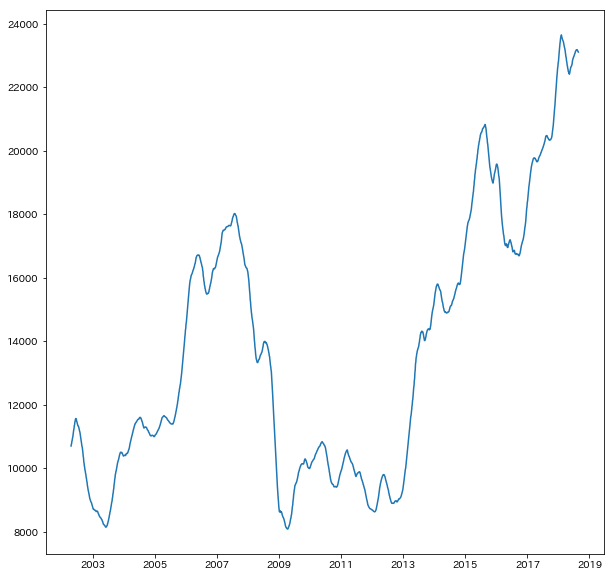

In [297]:
plt.figure(figsize = (10, 10))
plt.plot(data.iloc[:, 21])

In [346]:
data = data.drop(data.index[data.index <= '2002-04-14'])
data = data.drop(data.index[data.index >= '2018-08-24'])

In [347]:
#### 前日差+自然対数を取る
log_data = pd.DataFrame()

log_data['nikkei_diff_open_close_pos'] = (data['終値'] >= data['始値']) * 1 # target 
#log_data['nikkei_diff_open_close_neg'] = (data['終値'] <  data['始値']) * 1# target
log_data['nikkei_open_log'] = np.log(data['始値'] / data['始値'].shift())
log_data['nikkei_high_log'] = np.log(data['高値'] / data['高値'].shift())
log_data['nikkei_low_log'] = np.log(data['安値'] / data['安値'].shift())
log_data['nikkei_close_log'] = np.log(data['終値'] / data['終値'].shift())
log_data['nydow_close_log'] = np.log(data['Close'] / data['Close'].shift())
log_data['nikkei_volume'] = np.log(data['出来高'] / data['出来高'].shift())
log_data['exchange'] = np.log(data['USD'] / data['USD'].shift())
log_data['Close_EURONEXT_log'] = np.log(data['Close_EURONEXT'] / data['Close_EURONEXT'].shift())
log_data['Close_ALLORDS_log'] = np.log(data['Close_ALLORDS'] / data['Close_ALLORDS'].shift())
log_data['Close_HANGSENG_log'] = np.log(data['Close_HANGSENG'] / data['Close_HANGSENG'].shift())
log_data['Close_DAX_log'] = np.log(data['Close_DAX'] / data['Close_DAX'].shift())
log_data['Close_NYSE_log'] = np.log(data['Close_NYSE'] / data['Close_NYSE'].shift())
log_data['Close_SP500_log'] = np.log(data['Close_SP500'] / data['Close_SP500'].shift())

log_data['nikkei_diff_open_close_log'] = np.log(data['終値'] / data['始値'])
log_data['Close_EURONEXT_diff_log'] = np.log(data['Close_EURONEXT'] / data['Open_EURONEXT'])
log_data['Close_ALLORDS_diff_log'] = np.log(data['Close_ALLORDS'] / data['Open_ALLORDS'])
log_data['Close_HANGSENG_diff_log'] = np.log(data['Close_HANGSENG'] / data['Open_HANGSENG'])
log_data['Close_DAX_diff_log'] = np.log(data['Close_DAX'] / data['Open_DAX'])
log_data['Close_NYSE_diff_log'] = np.log(data['Close_NYSE'] / data['Open_NYSE'])
log_data['Close_SP500_diff_log'] = np.log(data['Close_SP500'] / data['Open_SP500'])

log_data['nikkei_five_mean_log'] = np.log(data['5日移動平均'] / data['5日移動平均'].shift())
log_data['nikkei_twentyfive_mean_log'] = np.log(data['25日移動平均'] / data['25日移動平均'].shift())
log_data['nikkei_seventyfive_mean_log'] = np.log(data['75日移動平均'] / data['75日移動平均'].shift())

log_data['nikkei_five_mean_diff_close_log'] = np.log(data['5日移動平均'] / data['終値'])
log_data['nikkei_twentyfive_mean_diff_close_log'] = np.log(data['25日移動平均'] / data['終値'])
log_data['nikkei_seventyfive_mean_diff_close_log'] = np.log(data['75日移動平均'] / data['終値'])

In [351]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4635 entries, 2002-04-16 to 2018-08-23
Data columns (total 27 columns):
nikkei_diff_open_close_pos                4635 non-null int64
nikkei_open_log                           4635 non-null float64
nikkei_high_log                           4635 non-null float64
nikkei_low_log                            4635 non-null float64
nikkei_close_log                          4635 non-null float64
nydow_close_log                           4635 non-null float64
nikkei_volume                             4635 non-null float64
exchange                                  4635 non-null float64
Close_EURONEXT_log                        4635 non-null float64
Close_ALLORDS_log                         4635 non-null float64
Close_HANGSENG_log                        4635 non-null float64
Close_DAX_log                             4635 non-null float64
Close_NYSE_log                            4635 non-null float64
Close_SP500_log                           463

In [349]:
# 先頭削除(データない）
log_data = log_data.drop(log_data.index[log_data.index == log_data.index[0]])

In [18]:
# 各変数を正規化する 不要
mms = MinMaxScaler()
log_data['nikkei_open_log'] = mms.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = mms.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = mms.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = mms.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = mms.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = mms.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = mms.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = mms.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = mms.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = mms.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = mms.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = mms.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = mms.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

log_data['nikkei_diff_open_close_log'] = mms.fit_transform(log_data['nikkei_diff_open_close_log'].values.reshape(-1, 1))
log_data['Close_EURONEXT_diff_log'] = mms.fit_transform(log_data['Close_EURONEXT_diff_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_diff_log'] = mms.fit_transform(log_data['Close_ALLORDS_diff_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_diff_log'] = mms.fit_transform(log_data['Close_HANGSENG_diff_log'].values.reshape(-1, 1))
log_data['Close_DAX_diff_log'] = mms.fit_transform(log_data['Close_DAX_diff_log'].values.reshape(-1, 1))
log_data['Close_NYSE_diff_log'] = mms.fit_transform(log_data['Close_NYSE_diff_log'].values.reshape(-1, 1))
log_data['Close_SP500_diff_log'] = mms.fit_transform(log_data['Close_SP500_diff_log'].values.reshape(-1, 1))

In [352]:
# 各変数を標準化する（X-μ/σ)
sc = StandardScaler()
log_data['nikkei_open_log'] = sc.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = sc.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = sc.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = sc.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = sc.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = sc.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = sc.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = sc.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = sc.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = sc.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = sc.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = sc.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = sc.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

log_data['nikkei_diff_open_close_log'] = sc.fit_transform(log_data['nikkei_diff_open_close_log'].values.reshape(-1, 1))
log_data['Close_EURONEXT_diff_log'] = sc.fit_transform(log_data['Close_EURONEXT_diff_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_diff_log'] = sc.fit_transform(log_data['Close_ALLORDS_diff_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_diff_log'] = sc.fit_transform(log_data['Close_HANGSENG_diff_log'].values.reshape(-1, 1))
log_data['Close_DAX_diff_log'] = sc.fit_transform(log_data['Close_DAX_diff_log'].values.reshape(-1, 1))
log_data['Close_NYSE_diff_log'] = sc.fit_transform(log_data['Close_NYSE_diff_log'].values.reshape(-1, 1))
log_data['Close_SP500_diff_log'] = sc.fit_transform(log_data['Close_SP500_diff_log'].values.reshape(-1, 1))

log_data['nikkei_five_mean_log'] = sc.fit_transform(log_data['nikkei_five_mean_log'].values.reshape(-1, 1))
log_data['nikkei_twentyfive_mean_log'] = sc.fit_transform(log_data['nikkei_twentyfive_mean_log'].values.reshape(-1, 1))
log_data['nikkei_seventyfive_mean_log'] = sc.fit_transform(log_data['nikkei_seventyfive_mean_log'].values.reshape(-1, 1))
log_data['nikkei_five_mean_diff_close_log'] = sc.fit_transform(log_data['nikkei_five_mean_diff_close_log'].values.reshape(-1, 1))
log_data['nikkei_twentyfive_mean_diff_close_log'] = sc.fit_transform(log_data['nikkei_twentyfive_mean_diff_close_log'].values.reshape(-1, 1))
log_data['nikkei_seventyfive_mean_diff_close_log'] = sc.fit_transform(log_data['nikkei_seventyfive_mean_diff_close_log'].values.reshape(-1, 1))

In [353]:
logdata_columns = log_data.columns
VARIABLE_LABEL = []
logged_time = 3
for column in logdata_columns:
    for i in range(1, logged_time + 1):
        VARIABLE_LABEL.append('{}_{}'.format(column, i))

In [354]:
VARIABLE_LABEL

['nikkei_diff_open_close_pos_1',
 'nikkei_diff_open_close_pos_2',
 'nikkei_diff_open_close_pos_3',
 'nikkei_open_log_1',
 'nikkei_open_log_2',
 'nikkei_open_log_3',
 'nikkei_high_log_1',
 'nikkei_high_log_2',
 'nikkei_high_log_3',
 'nikkei_low_log_1',
 'nikkei_low_log_2',
 'nikkei_low_log_3',
 'nikkei_close_log_1',
 'nikkei_close_log_2',
 'nikkei_close_log_3',
 'nydow_close_log_1',
 'nydow_close_log_2',
 'nydow_close_log_3',
 'nikkei_volume_1',
 'nikkei_volume_2',
 'nikkei_volume_3',
 'exchange_1',
 'exchange_2',
 'exchange_3',
 'Close_EURONEXT_log_1',
 'Close_EURONEXT_log_2',
 'Close_EURONEXT_log_3',
 'Close_ALLORDS_log_1',
 'Close_ALLORDS_log_2',
 'Close_ALLORDS_log_3',
 'Close_HANGSENG_log_1',
 'Close_HANGSENG_log_2',
 'Close_HANGSENG_log_3',
 'Close_DAX_log_1',
 'Close_DAX_log_2',
 'Close_DAX_log_3',
 'Close_NYSE_log_1',
 'Close_NYSE_log_2',
 'Close_NYSE_log_3',
 'Close_SP500_log_1',
 'Close_SP500_log_2',
 'Close_SP500_log_3',
 'nikkei_diff_open_close_log_1',
 'nikkei_diff_open_clo

In [371]:
training_test_data = pd.DataFrame()
training_test_data['nikkei_diff_open_close_pos'] = log_data['nikkei_diff_open_close_pos']
#training_test_data['nikkei_diff_open_close_neg'] = log_data['nikkei_diff_open_close_neg']

training_test_data['nikkei_open_log_1'] = log_data['nikkei_open_log'].shift(1)
training_test_data['nikkei_open_log_2'] = log_data['nikkei_open_log'].shift(2)
training_test_data['nikkei_open_log_3'] = log_data['nikkei_open_log'].shift(3)

training_test_data['nikkei_high_log_1'] = log_data['nikkei_high_log'].shift(1)
training_test_data['nikkei_high_log_2'] = log_data['nikkei_high_log'].shift(2)
training_test_data['nikkei_high_log_3'] = log_data['nikkei_high_log'].shift(3)

training_test_data['nikkei_low_log_1'] = log_data['nikkei_low_log'].shift(1)
training_test_data['nikkei_low_log_2'] = log_data['nikkei_low_log'].shift(2)
training_test_data['nikkei_low_log_3'] = log_data['nikkei_low_log'].shift(3)

training_test_data['nikkei_close_log_1'] = log_data['nikkei_close_log'].shift(1)
training_test_data['nikkei_close_log_2'] = log_data['nikkei_close_log'].shift(2)
training_test_data['nikkei_close_log_3'] = log_data['nikkei_close_log'].shift(3)

training_test_data['nydow_close_log_1'] = log_data['nydow_close_log'].shift(1)
training_test_data['nydow_close_log_2'] = log_data['nydow_close_log'].shift(2)
training_test_data['nydow_close_log_3'] = log_data['nydow_close_log'].shift(3)

training_test_data['nikkei_volume_1'] = log_data['nikkei_volume'].shift(1)
training_test_data['nikkei_volume_2'] = log_data['nikkei_volume'].shift(2)
training_test_data['nikkei_volume_3'] = log_data['nikkei_volume'].shift(3)

training_test_data['exchange_1'] = log_data['exchange'].shift(1)
training_test_data['exchange_2'] = log_data['exchange'].shift(2)
training_test_data['exchange_3'] = log_data['exchange'].shift(3)

training_test_data['Close_EURONEXT_log_1'] = log_data['Close_EURONEXT_log'].shift(1)
training_test_data['Close_EURONEXT_log_2'] = log_data['Close_EURONEXT_log'].shift(2)
training_test_data['Close_EURONEXT_log_3'] = log_data['Close_EURONEXT_log'].shift(3)

training_test_data['Close_ALLORDS_log_1'] = log_data['Close_ALLORDS_log'].shift(1)
training_test_data['Close_ALLORDS_log_2'] = log_data['Close_ALLORDS_log'].shift(2)
training_test_data['Close_ALLORDS_log_3'] = log_data['Close_ALLORDS_log'].shift(3)

training_test_data['Close_HANGSENG_log_1'] = log_data['Close_HANGSENG_log'].shift(1)
training_test_data['Close_HANGSENG_log_2'] = log_data['Close_HANGSENG_log'].shift(2)
training_test_data['Close_HANGSENG_log_3'] = log_data['Close_HANGSENG_log'].shift(3)

training_test_data['Close_DAX_log_1'] = log_data['Close_DAX_log'].shift(1)
training_test_data['Close_DAX_log_2'] = log_data['Close_DAX_log'].shift(2)
training_test_data['Close_DAX_log_3'] = log_data['Close_DAX_log'].shift(3)

training_test_data['Close_NYSE_log_1'] = log_data['Close_NYSE_log'].shift(1)
training_test_data['Close_NYSE_log_2'] = log_data['Close_NYSE_log'].shift(2)
training_test_data['Close_NYSE_log_3'] = log_data['Close_NYSE_log'].shift(3)

training_test_data['Close_SP500_log_1'] = log_data['Close_SP500_log'].shift(1)
training_test_data['Close_SP500_log_2'] = log_data['Close_SP500_log'].shift(2)
training_test_data['Close_SP500_log_3'] = log_data['Close_SP500_log'].shift(3)

training_test_data['nikkei_diff_open_close_log_1'] = log_data['nikkei_diff_open_close_log'].shift(1)
training_test_data['nikkei_diff_open_close_log_2'] = log_data['nikkei_diff_open_close_log'].shift(2)
training_test_data['nikkei_diff_open_close_log_3'] = log_data['nikkei_diff_open_close_log'].shift(3)

training_test_data['Close_EURONEXT_diff_log_1'] = log_data['Close_EURONEXT_diff_log'].shift(1)
training_test_data['Close_EURONEXT_diff_log_2'] = log_data['Close_EURONEXT_diff_log'].shift(2)
training_test_data['Close_EURONEXT_diff_log_3'] = log_data['Close_EURONEXT_diff_log'].shift(3)

training_test_data['Close_ALLORDS_diff_log_1'] = log_data['Close_ALLORDS_diff_log'].shift(1)
training_test_data['Close_ALLORDS_diff_log_2'] = log_data['Close_ALLORDS_diff_log'].shift(2)
training_test_data['Close_ALLORDS_diff_log_3'] = log_data['Close_ALLORDS_diff_log'].shift(3)

training_test_data['Close_HANGSENG_diff_log_1'] = log_data['Close_HANGSENG_diff_log'].shift(1)
training_test_data['Close_HANGSENG_diff_log_2'] = log_data['Close_HANGSENG_diff_log'].shift(2)
training_test_data['Close_HANGSENG_diff_log_3'] = log_data['Close_HANGSENG_diff_log'].shift(3)

training_test_data['Close_DAX_diff_log_1'] = log_data['Close_DAX_diff_log'].shift(1)
training_test_data['Close_DAX_diff_log_2'] = log_data['Close_DAX_diff_log'].shift(2)
training_test_data['Close_DAX_diff_log_3'] = log_data['Close_DAX_diff_log'].shift(3)

training_test_data['Close_NYSE_diff_log_1'] = log_data['Close_NYSE_diff_log'].shift(1)
training_test_data['Close_NYSE_diff_log_2'] = log_data['Close_NYSE_diff_log'].shift(2)
training_test_data['Close_NYSE_diff_log_3'] = log_data['Close_NYSE_diff_log'].shift(3)

training_test_data['Close_SP500_diff_log_1'] = log_data['Close_SP500_diff_log'].shift(1)
training_test_data['Close_SP500_diff_log_2'] = log_data['Close_SP500_diff_log'].shift(2)
training_test_data['Close_SP500_diff_log_3'] = log_data['Close_SP500_diff_log'].shift(3)

training_test_data['nikkei_five_mean_log_1'] = log_data['nikkei_five_mean_log'].shift(1)
training_test_data['nikkei_five_mean_log_2'] = log_data['nikkei_five_mean_log'].shift(2)
training_test_data['nikkei_five_mean_log_3'] = log_data['nikkei_five_mean_log'].shift(3)

training_test_data['nikkei_twentyfive_mean_log_1'] = log_data['nikkei_twentyfive_mean_log'].shift(1)
training_test_data['nikkei_twentyfive_mean_log_2'] = log_data['nikkei_twentyfive_mean_log'].shift(2)
training_test_data['nikkei_twentyfive_mean_log_3'] = log_data['nikkei_twentyfive_mean_log'].shift(3)

training_test_data['nikkei_seventyfive_mean_log_1'] = log_data['nikkei_seventyfive_mean_log'].shift(1)
training_test_data['nikkei_seventyfive_mean_log_2'] = log_data['nikkei_seventyfive_mean_log'].shift(2)
training_test_data['nikkei_seventyfive_mean_log_3'] = log_data['nikkei_seventyfive_mean_log'].shift(3)

training_test_data['nikkei_five_mean_diff_close_log_1'] = log_data['nikkei_five_mean_diff_close_log'].shift(1)
training_test_data['nikkei_five_mean_diff_close_log_2'] = log_data['nikkei_five_mean_diff_close_log'].shift(2)
training_test_data['nikkei_five_mean_diff_close_log_3'] = log_data['nikkei_five_mean_diff_close_log'].shift(3)

training_test_data['nikkei_twentyfive_mean_diff_close_log_1'] = log_data['nikkei_twentyfive_mean_diff_close_log'].shift(1)
training_test_data['nikkei_twentyfive_mean_diff_close_log_2'] = log_data['nikkei_twentyfive_mean_diff_close_log'].shift(2)
training_test_data['nikkei_twentyfive_mean_diff_close_log_3'] = log_data['nikkei_twentyfive_mean_diff_close_log'].shift(3)

training_test_data['nikkei_seventyfive_mean_diff_close_log_1'] = log_data['nikkei_seventyfive_mean_diff_close_log'].shift(1)
training_test_data['nikkei_seventyfive_mean_diff_close_log_2'] = log_data['nikkei_seventyfive_mean_diff_close_log'].shift(2)
training_test_data['nikkei_seventyfive_mean_diff_close_log_3'] = log_data['nikkei_seventyfive_mean_diff_close_log'].shift(3)


In [373]:
for _ in range(3):
    training_test_data = training_test_data.drop(training_test_data.index[training_test_data.index == training_test_data.index[0]])


In [376]:
predictor_vars = training_test_data[training_test_data.columns[1:]]
explained_vars = training_test_data[training_test_data.columns[:1]]

In [378]:
# 学習用データは0.8 検証用データは0.1 テストは0.1
len_index = len(training_test_data)
training_data_size = int(len_index * 0.8)
val_data_size = int(len_index * 0.1)
test_data_size = int(len_index * 0.1)

training_predictor_vars = predictor_vars[:training_data_size]
training_explained_vars = explained_vars[:training_data_size]

val_predictor_vars = predictor_vars[training_data_size: training_data_size + val_data_size]
val_explained_vars = explained_vars[training_data_size: training_data_size + val_data_size]

test_predictor_vars = predictor_vars[training_data_size + val_data_size:]
test_explained_vars = explained_vars[training_data_size + val_data_size:]

# XGBoost

In [377]:
import xgboost as xgb

In [29]:
mod = xgb.XGBRegressor()
mod.fit(training_predictor_vars.values, training_explained_vars.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
y_train_pred = mod.predict(training_predictor_vars.values)
y_val_pred = mod.predict(val_predictor_vars.values)
# MSE
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(training_explained_vars.values, y_train_pred), mean_squared_error(val_explained_vars.values, y_val_pred)) )
# R^2
from sklearn.metrics import r2_score
#print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 0.185, test : 0.241


In [43]:
y_test_pred = mod.predict(test_predictor_vars.values)

In [44]:
accuracy_train2 = np.round(y_test_pred).reshape(-1, 1)

In [46]:
tmp = 0
for pre, re in zip(accuracy_train2, test_explained_vars.values):
    if pre[0] == re[0]:
        tmp += 1
        
print(tmp/len(test_explained_vars.values))

0.5797413793103449


# ここから

In [379]:
# グリッドサーチに必要なクラスのインポート
from sklearn.grid_search import GridSearchCV
# サーチするパラメータは範囲を指定
params = {'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 10, 100], 'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 1.0]}
# モデルのインスタンス作成
mod = xgb.XGBClassifier(objective = 'binary:logistic')
# 10-fold Cross Validationでパラメータ選定
cv = GridSearchCV(mod, params, cv = 10, scoring= 'accuracy', n_jobs =1)
cv.fit(training_predictor_vars.values, training_explained_vars.values.reshape(-1))

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/li

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 10, 100], 'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [380]:
mod = xgb.XGBClassifier(**cv.best_params_, objective = 'binary:logistic')
mod.fit(training_predictor_vars.values, training_explained_vars.values.reshape(-1))

#import pickle
#pickle.dump(mod, open("model.pkl", "wb"))
#mod = pickle.load(open("model.pkl", "rb"))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [394]:
from sklearn.metrics import confusion_matrix, classification_report

pred = mod.predict(training_predictor_vars.values)
print(confusion_matrix(training_explained_vars.values.reshape(-1), pred))
print(classification_report(training_explained_vars.values.reshape(-1), pred))

[[1103  675]
 [ 313 1614]]
             precision    recall  f1-score   support

          0       0.78      0.62      0.69      1778
          1       0.71      0.84      0.77      1927

avg / total       0.74      0.73      0.73      3705



/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


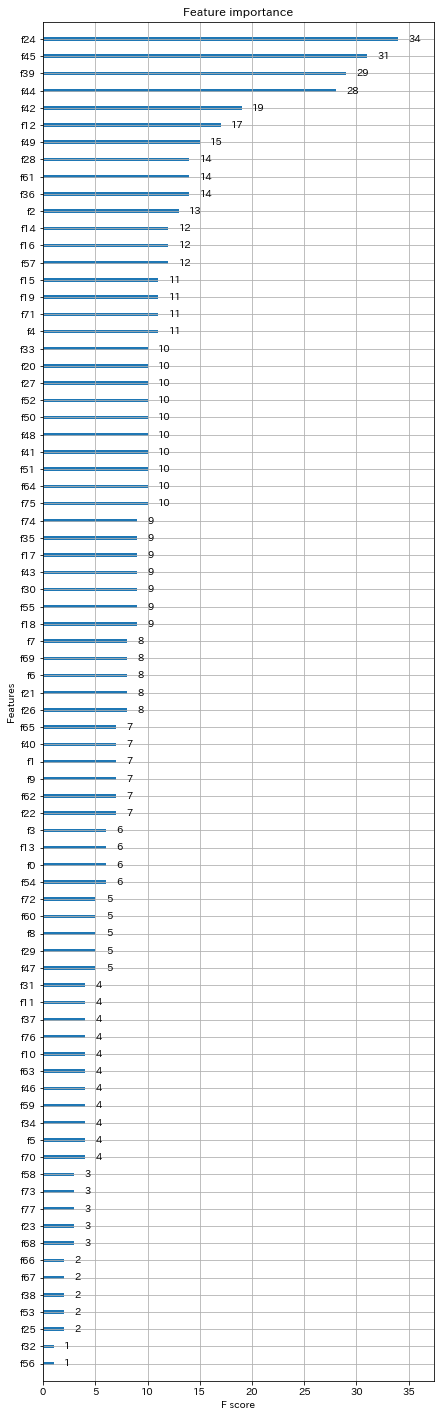

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(7, 25))
xgb.plot_importance(mod, ax = ax)

In [396]:
predict = mod.predict(training_predictor_vars.values)

tmp = 0
for pre, re in zip(predict, training_explained_vars.values):
    if pre == re[0]:
        tmp += 1
        
print(tmp/len(training_explained_vars.values))

0.7333333333333333


/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [398]:
predict = mod.predict(val_predictor_vars.values)

tmp = 0
for pre, re in zip(predict, val_explained_vars.values):
    if pre == re[0]:
        tmp += 1
        
print(tmp/len(val_predictor_vars.values))

0.6069114470842333


/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [399]:
predict = mod.predict(test_predictor_vars.values)

tmp = 0
for pre, re in zip(predict, test_explained_vars.values):
    if pre == re[0]:
        tmp += 1
        
print(tmp/len(test_predictor_vars.values))

0.5948275862068966


/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# LightGBM

In [53]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [74]:
X_train = training_predictor_vars.values
y_train = training_explained_vars.values

X_val = val_predictor_vars.values
y_val = val_explained_vars.values

X_test = test_predictor_vars.values
y_test = test_explained_vars.values

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_train)

# AUC (Area Under the Curve) を計算
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9881735314173812


/Users/yaguchitomoya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
accuracy_train2 = np.round(y_test).reshape(-1, 1)

tmp = 0
for pre, re in zip(accuracy_train2, y_test):
    if pre[0] == re[0]:
        tmp += 1
        
print(tmp/len(y_test))

1.0


In [87]:
from sklearn.datasets import load_digits

In [88]:
digits = load_digits()
X_train, X_test = digits.data[:1000], digits.data[1000:]

In [92]:
y_train, y_test = digits.target[:1000], digits.target[1000:]

In [98]:
y_train.shape

(1000,)